In [1]:
from govfunc._utils import *
import numpy, rsatoolbox
import seaborn as sns
import numpy as np
from numpy.linalg import norm
import pandas as pd
import scipy.stats as stats
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt


In [33]:
dataset = get_dataset(OmegaConf.load("../conf/dataset.yaml"))
folder = dataset["worm0"]["dataset"]

coef_data = dict()

Chosen dataset(s): ['Uzel2022']
Num. worms: 6
Worm names: ['worm0', 'worm1', 'worm2', 'worm3', 'worm4', 'worm5']




In [34]:
for index in range(0, len(dataset)):
    worm = "worm" + str(index)
    data = pd.read_hdf(folder + "/coefficient_CalToRes_tau_0/coef_" + worm + ".hdf")
    print(data.shape)
    coef_data[worm] = data


(303, 302)
(303, 302)
(303, 302)
(303, 302)
(303, 302)
(303, 302)


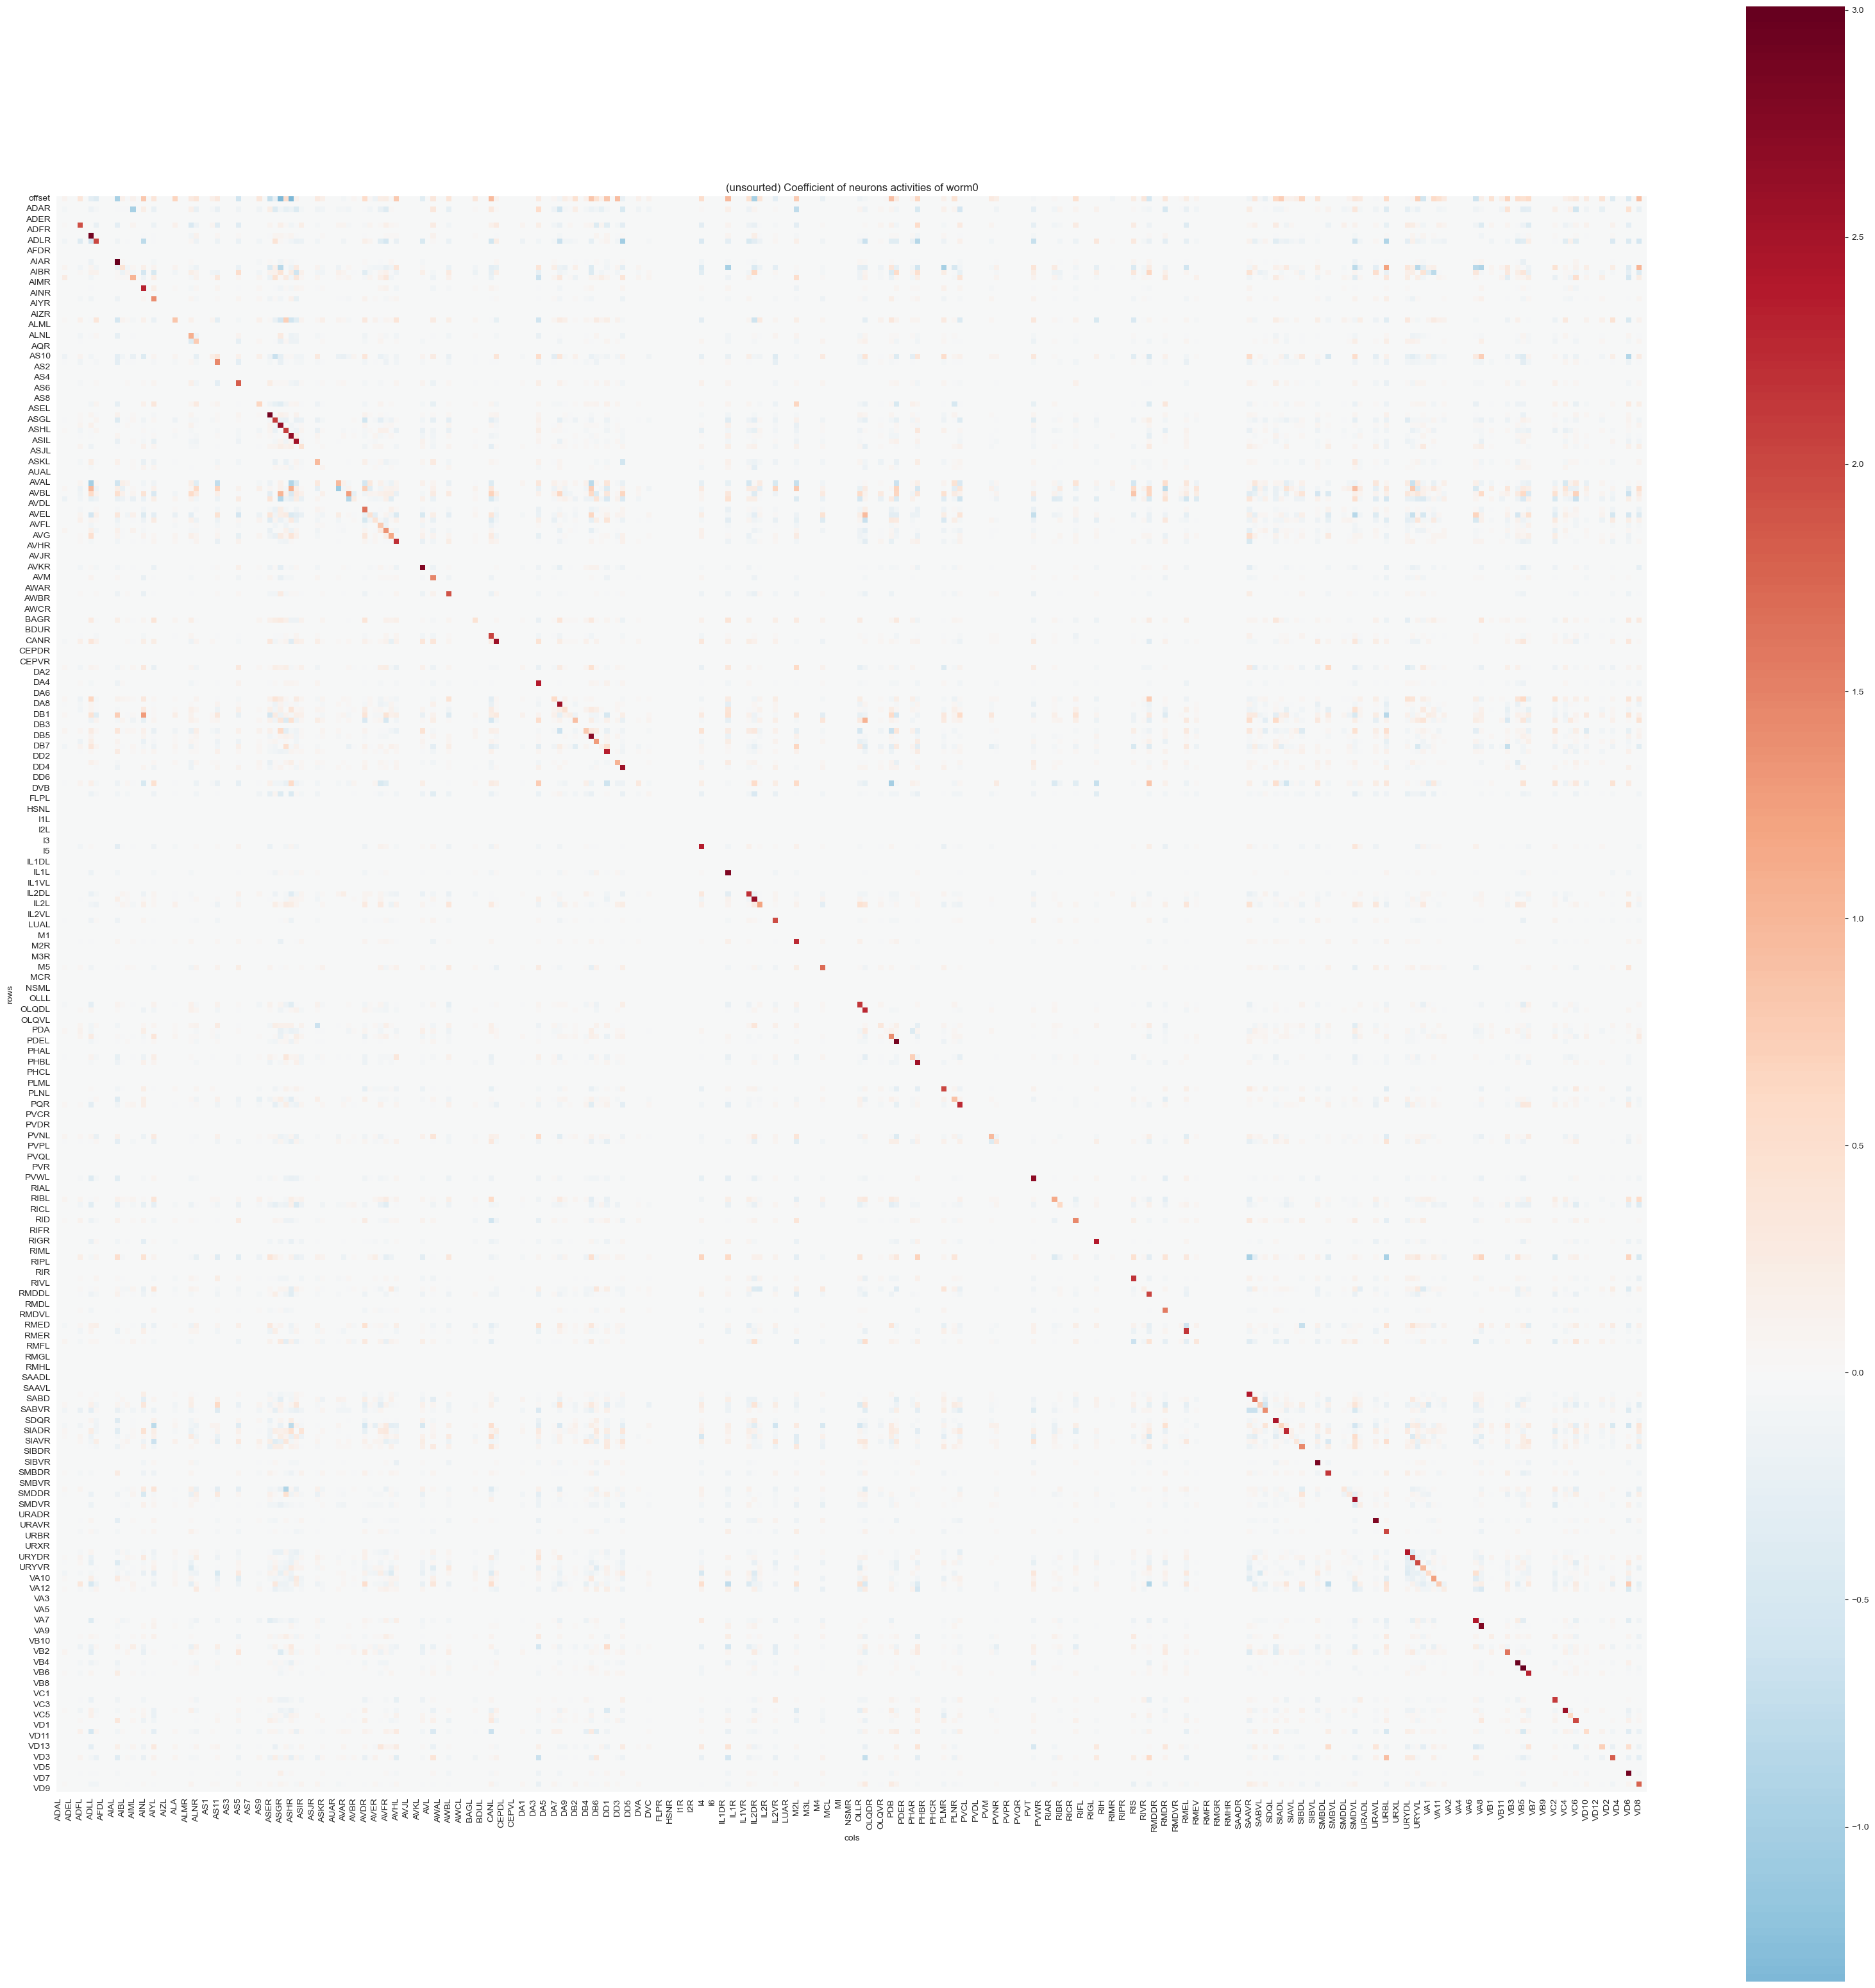

{'worm0': cols    ADAL      ADAR  ADEL  ADER      ADFL  ADFR      ADLL      ADLR  AFDL  \
rows                                                                           
offset   0.0  0.104036   0.0   0.0  0.367912   0.0 -0.273079 -0.379773   0.0   
ADAL     0.0  0.000000   0.0   0.0  0.000000   0.0  0.000000  0.000000   0.0   
ADAR     0.0 -0.077294   0.0   0.0  0.000000   0.0 -0.159545 -0.064562   0.0   
ADEL     0.0  0.000000   0.0   0.0  0.000000   0.0  0.000000  0.000000   0.0   
ADER     0.0  0.000000   0.0   0.0  0.000000   0.0  0.000000  0.000000   0.0   
...      ...       ...   ...   ...       ...   ...       ...       ...   ...   
VD5      0.0  0.000000   0.0   0.0  0.000000   0.0  0.000000  0.000000   0.0   
VD6      0.0  0.000000   0.0   0.0 -0.028382   0.0 -0.045114 -0.040166   0.0   
VD7      0.0  0.000000   0.0   0.0  0.000000   0.0  0.000000  0.000000   0.0   
VD8      0.0  0.035313   0.0   0.0  0.000000   0.0 -0.097637 -0.088064   0.0   
VD9      0.0  0.000000   0.0  

In [35]:
plot_coefficient_no_save(coef_data["worm0"], "worm0", False)
print(coef_data)
print(len(coef_data["worm0"].columns.values.tolist()), len(coef_data["worm0"].index.tolist()))

### Cosine Similarity


In [36]:
cos_similarity = dict()
length = coef_data["worm0"].shape[0]
cos_similarity_np = np.zeros(shape=[len(dataset), len(dataset)])
for i in range(len(dataset)):
    for j in range(len(dataset)):
        w1 = "worm" + str(i)
        w2 = "worm" + str(j)
        w_join = w1 + "_" + w2
        cos_res = np.dot(coef_data[w1], coef_data[w2].T)/(norm(coef_data[w1])*norm(coef_data[w2]))
        cos_similarity_np[i, j] = norm(cos_res)
        cos_similarity[w_join] = cos_res

In [37]:
for key,value in cos_similarity.items():
	print(key, ':', norm(cos_similarity[key]))

worm0_worm0 : 0.1467244135911205
worm0_worm1 : 0.055117031802469046
worm0_worm2 : 0.053215095649668524
worm0_worm3 : 0.05613776987393002
worm0_worm4 : 0.06179681678115275
worm0_worm5 : 0.04775006848790132
worm1_worm0 : 0.05511703180246904
worm1_worm1 : 0.1507115138963545
worm1_worm2 : 0.057708456216489096
worm1_worm3 : 0.05423867465405216
worm1_worm4 : 0.06106454481273401
worm1_worm5 : 0.06447103917905948
worm2_worm0 : 0.053215095649668524
worm2_worm1 : 0.057708456216489096
worm2_worm2 : 0.15276157545948787
worm2_worm3 : 0.05109838317774185
worm2_worm4 : 0.05889041628983244
worm2_worm5 : 0.05752928205445945
worm3_worm0 : 0.05613776987393001
worm3_worm1 : 0.05423867465405216
worm3_worm2 : 0.05109838317774186
worm3_worm3 : 0.16149678549857557
worm3_worm4 : 0.046287042917818065
worm3_worm5 : 0.06318111238659678
worm4_worm0 : 0.06179681678115275
worm4_worm1 : 0.06106454481273401
worm4_worm2 : 0.05889041628983244
worm4_worm3 : 0.046287042917818065
worm4_worm4 : 0.1472442559068452
worm4_worm

/Users/ivy/Desktop/MetaConscious/worm-graph/govfunc


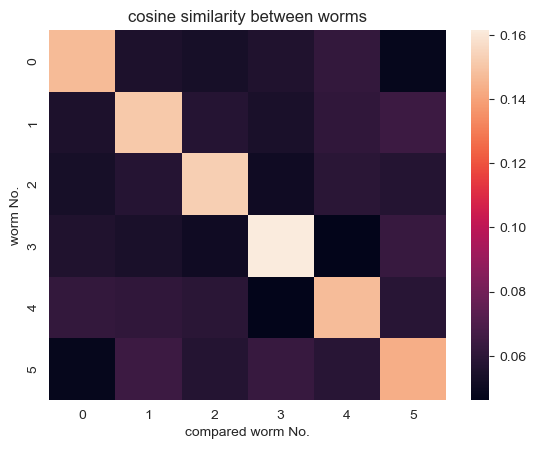

In [43]:
sns.heatmap(data=cos_similarity_np)
plt.title("cosine similarity between worms")
plt.ylabel("worm No.")
plt.xlabel("compared worm No.")
plt.savefig(os.path.join(os.getcwd(), 'correlation.png'))
print(os.getcwd())

### Representation Similarity Analysis


In [39]:
import numpy, rsatoolbox

In [40]:
sample = coef_data["worm0"]
print(sample.shape)
print(sample.index, sample.columns)

sample_data_rsa = rsatoolbox.data.Dataset(sample,
    channel_descriptors={'post': sample.columns},
    obs_descriptors={'pre': sample.index})


(303, 302)
Index(['offset', 'ADAL', 'ADAR', 'ADEL', 'ADER', 'ADFL', 'ADFR', 'ADLL',
       'ADLR', 'AFDL',
       ...
       'VD12', 'VD13', 'VD2', 'VD3', 'VD4', 'VD5', 'VD6', 'VD7', 'VD8', 'VD9'],
      dtype='object', name='rows', length=303) Index(['ADAL', 'ADAR', 'ADEL', 'ADER', 'ADFL', 'ADFR', 'ADLL', 'ADLR', 'AFDL',
       'AFDR',
       ...
       'VD12', 'VD13', 'VD2', 'VD3', 'VD4', 'VD5', 'VD6', 'VD7', 'VD8', 'VD9'],
      dtype='object', name='cols', length=302)


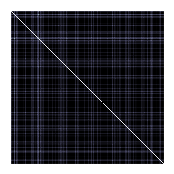

In [12]:
dataset_rsa = sample_data_rsa
rdm = rsatoolbox.rdm.calc_rdm(rsatoolbox.data.Dataset(sample.to_numpy()))
rsatoolbox.vis.show_rdm(rdm)
rdm_nonsquare = rsatoolbox.rdm.sqrt_transform(rdm)
